<a href="https://colab.research.google.com/github/najjouj/machine-learning/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [275]:
data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')


## Explore Data

In [276]:
#data.head()
#data.tail()
data.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
463,LP002489,Female,No,1,Not Graduate,NaN,5191,0.0,132.0,360.0,1.0,Semiurban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
41,LP001120,Male,No,0,Graduate,No,1800,1213.0,47.0,360.0,1.0,Urban,Y


In [277]:
data.shape

(614, 13)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [279]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [280]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

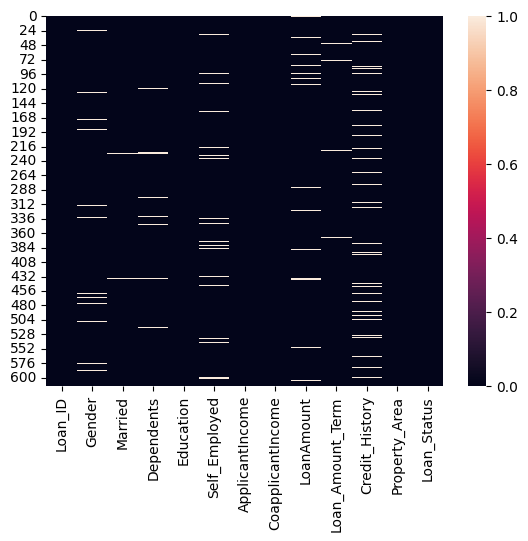

In [281]:
sns.heatmap(data.isnull())

In [282]:
data=data.dropna()

In [283]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

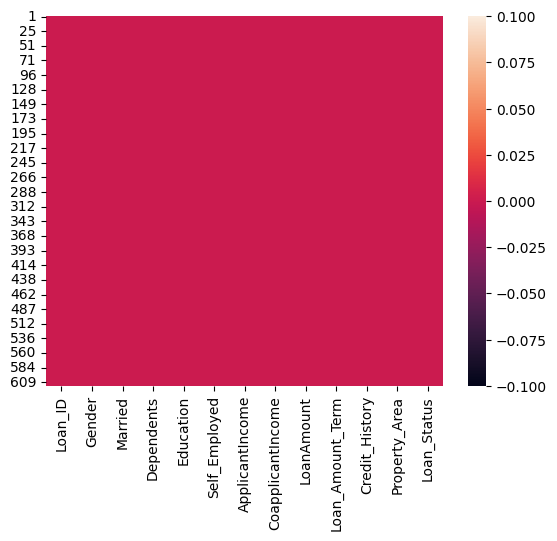

In [284]:
sns.heatmap(data.isnull())

In [285]:
data.Dependents.value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [286]:
data=data.replace(to_replace='3+',value=4)

In [287]:
data.Dependents.value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Gender', ylabel='count'>

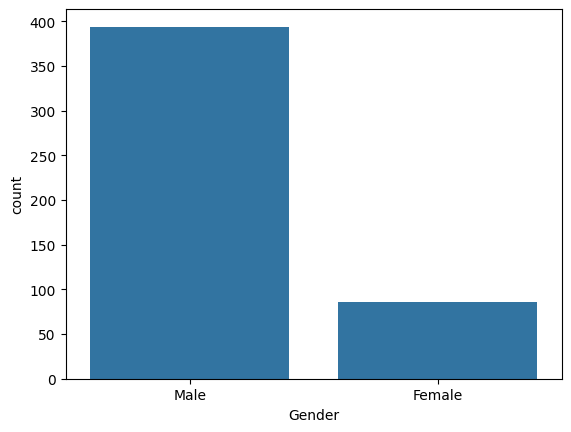

In [288]:
sns.countplot(data=data,x='Gender')

<Axes: xlabel='Education', ylabel='count'>

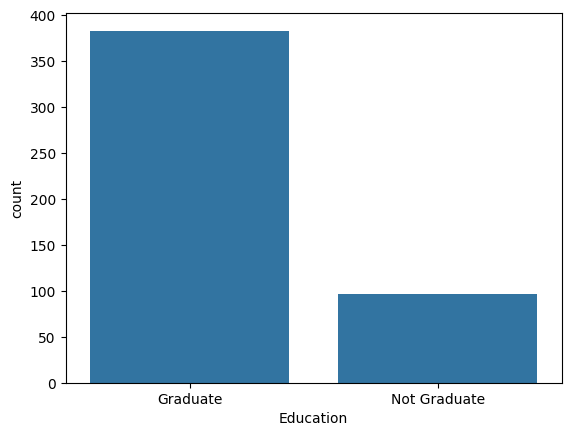

In [289]:
sns.countplot(data=data,x='Education')

Text(0.5, 1.0, 'Loan_Status vs Education')

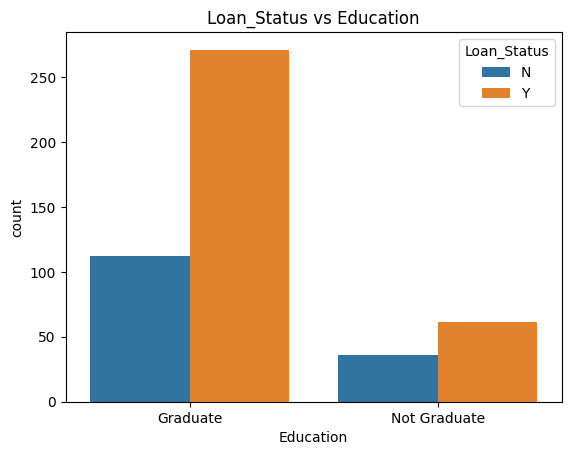

In [290]:
sns.countplot(data=data,x='Education',hue='Loan_Status')
plt.title('Loan_Status vs Education')

## Transform Data

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [292]:
data.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
154,LP001535,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y
52,LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,N
538,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N


In [293]:
data=data.replace(to_replace=['Male','Female'],value=[0,1])

/tmp/ipython-input-449415705.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(to_replace=['Male','Female'],value=[0,1])


In [294]:
data.Gender.value_counts()

,count
Gender,
0,394
1,86


In [295]:
data=data.replace(to_replace=['Graduate','Not Graduate'],value=[0,1])
data=data.replace(to_replace=['Yes','No'],value=[0,1])


/tmp/ipython-input-2443227954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(to_replace=['Graduate','Not Graduate'],value=[0,1])
/tmp/ipython-input-2443227954.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(to_replace=['Yes','No'],value=[0,1])


In [296]:
data.Married.value_counts()

,count
Married,
0,311
1,169


In [297]:
data.Education.value_counts()

,count
Education,
0,383
1,97


In [298]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [299]:
data=data.replace(to_replace=['Rural','Urban','Semiurban'],value=[0,1,2])
data=data.replace(to_replace=['Y','N'],value=[0,1])

/tmp/ipython-input-2686668737.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(to_replace=['Rural','Urban','Semiurban'],value=[0,1,2])
/tmp/ipython-input-2686668737.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace(to_replace=['Y','N'],value=[0,1])


In [300]:
data.Property_Area.value_counts()

,count
Property_Area,
2,191
1,150
0,139


In [301]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
320,LP002051,0,0,0,0,1,2400,2167.0,115.0,360.0,1.0,2,0
538,LP002739,0,0,0,1,1,2917,536.0,66.0,360.0,1.0,0,1
439,LP002407,1,0,0,1,0,7142,0.0,138.0,360.0,1.0,0,0
509,LP002634,1,1,1,0,1,13262,0.0,40.0,360.0,1.0,1,0
350,LP002139,0,0,0,0,1,9083,0.0,228.0,360.0,1.0,2,0


## Create Model

In [302]:
y=data.Loan_Status
x=data.drop(['Loan_Status','Loan_ID'],axis=1)

In [303]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=40,shuffle=True)

In [304]:
model=SVC()

In [305]:
model.fit(x_train,y_train)

SVC()

In [306]:
pred=model.predict(x_test)

In [307]:
accuracy_score(y_test,pred)

0.7708333333333334